In [73]:
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller

In [74]:
sns.set(rc={'figure.figsize':(20,10)})
#plt.style.use("dark_background")

In [75]:
client = bigquery.Client.from_service_account_json("key.json")

In [76]:
df = client.query("SELECT * FROM `keycashtest.keycash_dataset.CREDIT_PER_DAY`").\
    result().\
    to_dataframe()

df = df.sort_values(by = 'day').reset_index(drop = True)
df['soma_credito_cumulativa'] = df['soma_credito'].expanding(min_periods=1).sum().astype(int)
df['day_week'] = pd.to_datetime(df['day'], errors='coerce').dt.day_name()

df.head()

,soma_credito,day,soma_credito_cumulativa,day_week
0,1610289,2022-01-01,1610289,Saturday
1,4078285,2022-01-02,5688574,Sunday
2,6966696,2022-01-03,12655270,Monday
3,844524,2022-01-04,13499794,Tuesday
4,1758265,2022-01-05,15258059,Wednesday


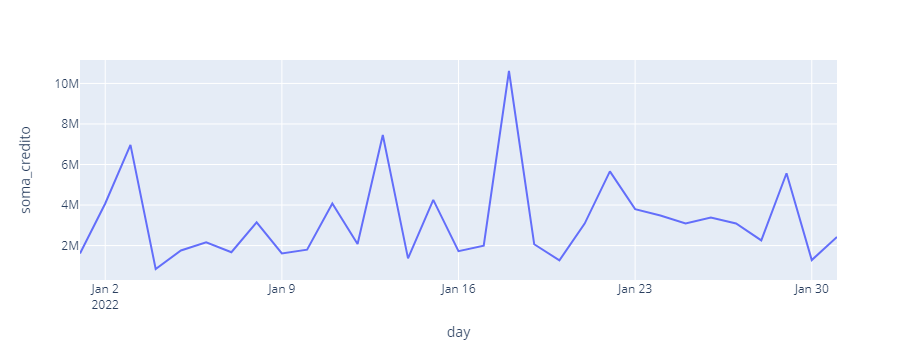

In [77]:
fig = px.line(df, x = 'day', y = 'soma_credito')
fig.show()

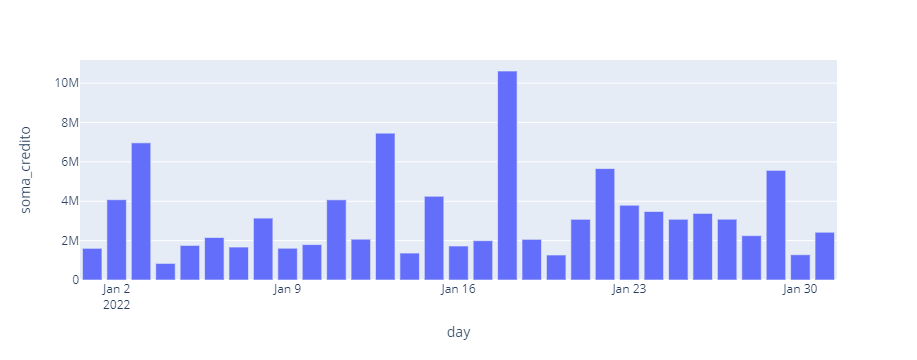

In [78]:
#plot = sns.barplot(data = df, x = 'day', y = 'soma_credito')
#rotate = plt.xticks(rotation=45)
fig = px.bar(df, x = 'day', y = 'soma_credito')
fig.show()

Text(0.5, 1.0, 'Distribuição de créditos')

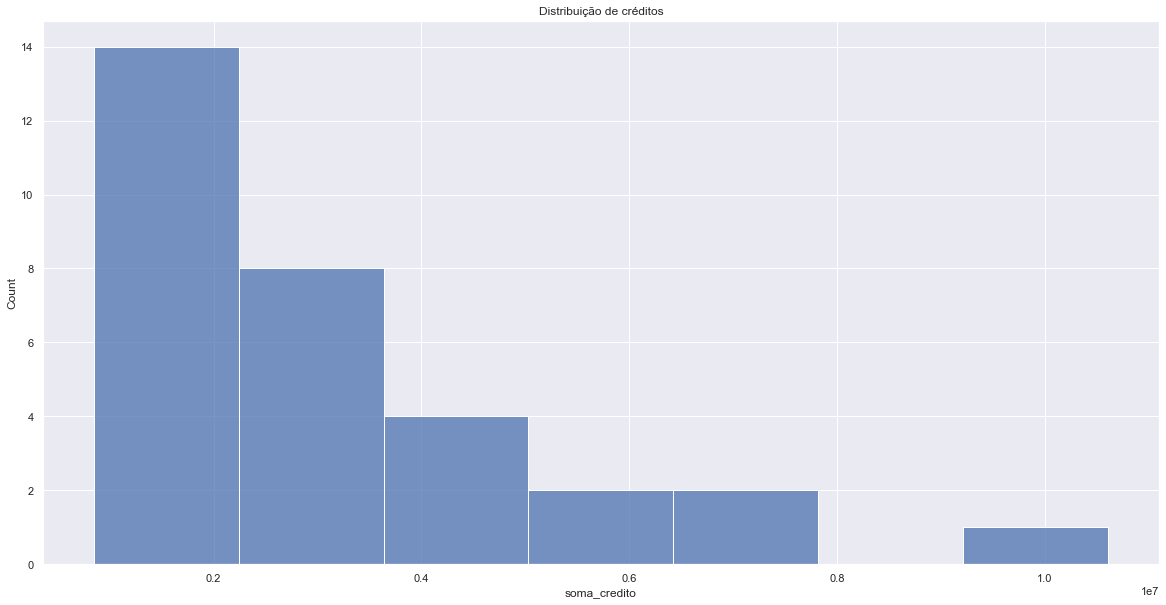

In [79]:
sns.histplot(df['soma_credito']).set_title('Distribuição de créditos')

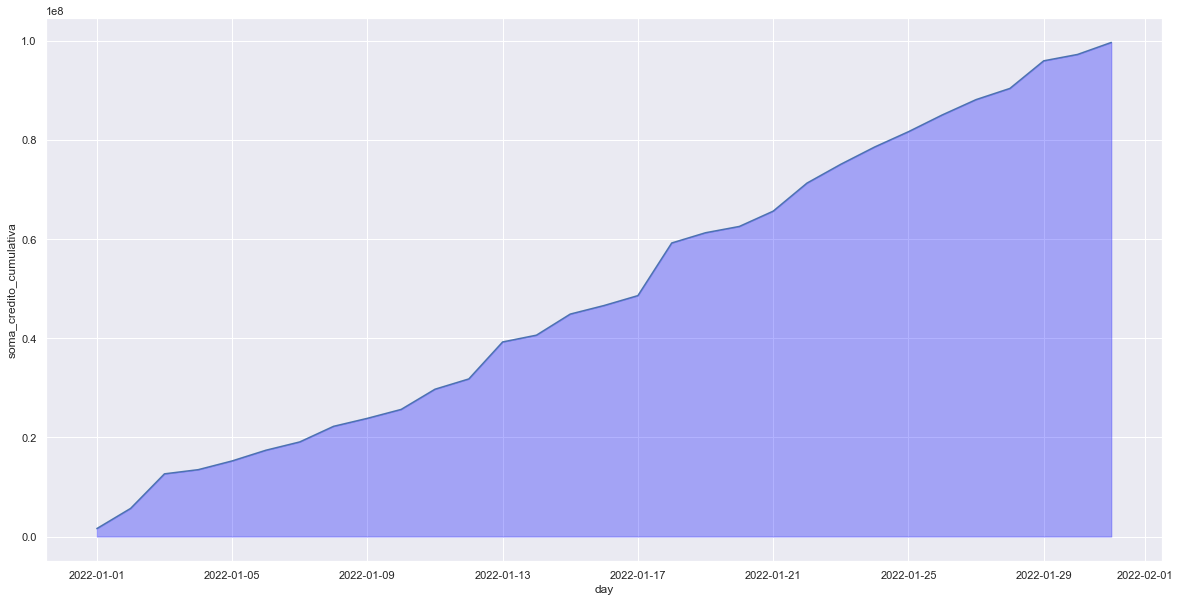

In [80]:
ax = sns.lineplot(data = df, x= 'day', y='soma_credito_cumulativa')
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1,y1, color="blue", alpha=0.3)

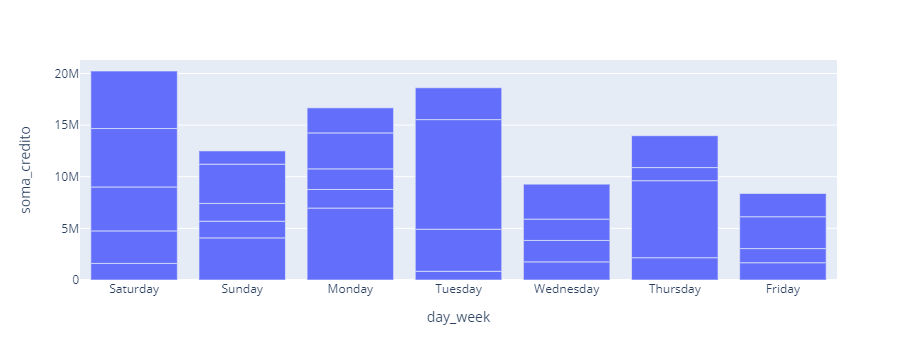

In [81]:
fig = px.bar(df, x = 'day_week', y = 'soma_credito')
fig.show()

## Dickey-Fuller Aumentado

H0: A série é não estacionária (p valor > .05)
H1: H0 rejeitado, a série é estacionária (p valor <= .05)


P-valor: 1.401317036616014e-05
A série é estacionária


<AxesSubplot:xlabel='day', ylabel='soma_credito'>

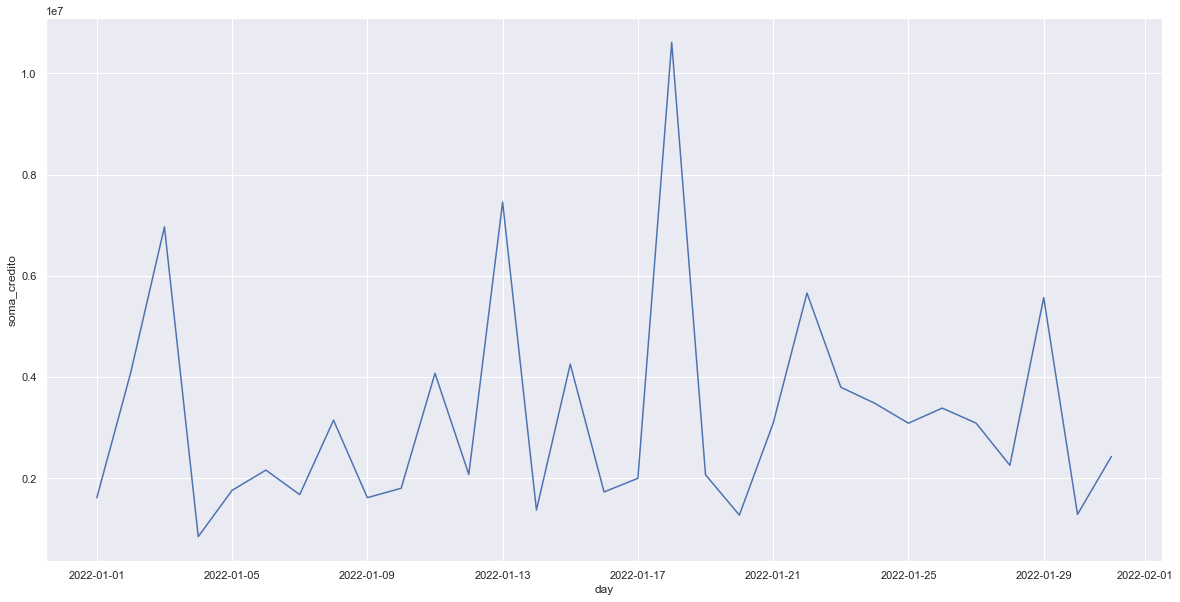

In [82]:
result = adfuller(df['soma_credito'])

print("H0: A série é não estacionária (p valor > .05)")
print("H1: H0 rejeitado, a série é estacionária (p valor <= .05)")
print('\n')

print('P-valor: ' + str(result[1]))
if result[1] < .05:
    print("A série é estacionária")
else:
    print("A série é não estacionária")
    
sns.lineplot(data = df, x= 'day', y='soma_credito')